In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import ast
import matplotlib.pyplot as plt
from joypy import joyplot
import ast
from fancyimpute import IterativeImputer
from dateutil.relativedelta import *

In [72]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from math import sqrt

%matplotlib inline

## <font color='#eb3483'>EDA and Data Cleaning</font>

In [3]:
train = pd.read_csv("Train.csv")

In [4]:
train['FirstPaymentDate'] = np.nan
train['LastPaymentDate'] = np.nan
train["TotalPastPayments"] = np.nan
train["AveragePayment"] = np.nan


In [5]:
sum_payments = 0.0

for i,data in train.iterrows():
    transaction_dates = []
    payments = []
    dates = data.iloc[1][1:-1].split(", ")
    paymentshistory = data.iloc[2][1:-1].split(", ")
    for date in dates:
        transaction_dates.append(pd.to_datetime(date[1:-1]).date())
    train.TransactionDates.iloc[i] = np.array(transaction_dates)
    train.LastPaymentDate.iloc[i] = transaction_dates[-1]
    train.FirstPaymentDate.iloc[i] = transaction_dates[0]
    
    for payment in paymentshistory:
        payments.append(float(payment))
    train.PaymentsHistory.iloc[i] = np.array(payments)
    
    train.TotalPastPayments.iloc[i] = sum(payments)
    train.AveragePayment.iloc[i] = sum(payments)/len(payments)

train.head()

C:\Users\alexi\miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,FirstPaymentDate,LastPaymentDate,TotalPastPayments,AveragePayment
0,ID_MR53LEX,"[2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2018-04-01,2020-11-01,16035.0,517.258065
1,ID_3D7NQUH,"[2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2018-04-01,2020-11-01,22136.0,737.866667
2,ID_0IWQNPI,"[2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-01,2020-07-01,6760.0,1126.666667
3,ID_IY8SYB9,"[2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-01,2018-06-01,11260.0,1126.000000
4,ID_9XHL7VZ,"[2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2017-09-01,2019-11-01,7779.0,353.590909


In [8]:
date_list = []
for i,data in train.iterrows():
    dates = data[1]
    for date in dates:
        if not date in date_list:
            date_list.append(date)
date_list.sort()
date_list
         

[datetime.date(2015, 11, 1),
 datetime.date(2015, 12, 1),
 datetime.date(2016, 1, 1),
 datetime.date(2016, 2, 1),
 datetime.date(2016, 3, 1),
 datetime.date(2016, 4, 1),
 datetime.date(2016, 5, 1),
 datetime.date(2016, 6, 1),
 datetime.date(2016, 7, 1),
 datetime.date(2016, 8, 1),
 datetime.date(2016, 9, 1),
 datetime.date(2016, 10, 1),
 datetime.date(2016, 11, 1),
 datetime.date(2016, 12, 1),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 2, 1),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 4, 1),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 6, 1),
 datetime.date(2017, 7, 1),
 datetime.date(2017, 8, 1),
 datetime.date(2017, 9, 1),
 datetime.date(2017, 10, 1),
 datetime.date(2017, 11, 1),
 datetime.date(2017, 12, 1),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 3, 1),
 datetime.date(2018, 4, 1),
 datetime.date(2018, 5, 1),
 datetime.date(2018, 6, 1),
 datetime.date(2018, 7, 1),
 datetime.date(2018, 8, 1),
 datetime.date(2018, 9, 1),
 datetime.da

In [9]:
for col in date_list:
    train[col] = np.nan
train.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6,FirstPaymentDate,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_MR53LEX,"[2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2018-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_3D7NQUH,"[2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2018-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_0IWQNPI,"[2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_IY8SYB9,"[2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_9XHL7VZ,"[2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2017-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for i, data in train.iterrows():
    for j in range(len(data[2])):
        train[data[1][j]][i] = data[2][j]

C:\Users\alexi\AppData\Local\Temp/ipykernel_15692/3220214417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[data[1][j]][i] = data[2][j]


In [11]:
train.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)
train.head()

,ID,m1,m2,m3,m4,m5,m6,FirstPaymentDate,LastPaymentDate,TotalPastPayments,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_MR53LEX,880.0,930.0,495.0,715.0,220.0,385.0,2018-04-01,2020-11-01,16035.0,...,120.0,260.0,610.0,230.0,390.0,660.0,1200.0,1320.0,280.0,770.0
1,ID_3D7NQUH,660.0,935.0,935.0,825.0,770.0,935.0,2018-04-01,2020-11-01,22136.0,...,655.0,605.0,495.0,442.0,495.0,605.0,660.0,660.0,655.0,770.0
2,ID_0IWQNPI,700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-01,2020-07-01,6760.0,...,2850.0,1500.0,1350.0,610.0,200.0,250.0,NaN,NaN,NaN,NaN
3,ID_IY8SYB9,580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-01,2018-06-01,11260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_9XHL7VZ,40.0,440.0,460.0,360.0,80.0,330.0,2017-09-01,2019-11-01,7779.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train.dtypes

ID             object
m1            float64
m2            float64
m3            float64
m4            float64
               ...   
2020-07-01    float64
2020-08-01    float64
2020-09-01    float64
2020-10-01    float64
2020-11-01    float64
Length: 72, dtype: object

In [15]:
train.FirstPaymentDate = pd.to_datetime(train.FirstPaymentDate, format="%Y-%m-%d")
train.LastPaymentDate = pd.to_datetime(train.LastPaymentDate, format="%Y-%m-%d")

In [ ]:
train.LastPaymentDate

0       2020-11-01
1       2020-11-01
2       2020-07-01
3       2018-06-01
4       2019-11-01
           ...    
28002   2019-04-01
28003   2020-09-01
28004   2020-09-01
28005   2018-09-01
28006   2018-06-01
Name: LastPaymentDate, Length: 28007, dtype: datetime64[ns]

In [101]:
train.columns = train.columns.astype(str)

In [18]:
#seeing outliers in each month (m1-m6)
def print_boxplot(attr):
    sns.boxplot(x=train[attr])

In [19]:
train = train.loc[train.m1<=10000,:]

In [20]:
train = train.loc[train.m2<=60000,:]

In [23]:
train = train.loc[train.m3<=15000,:]

In [25]:
train = train.loc[train.m4<=30000,:]

In [24]:
train = train.loc[train.m6<=40000,:]

In [84]:
train.fillna(0, inplace=True)

In [85]:
train.head()

,ID,m1,m2,m3,m4,m5,m6,FirstPaymentDate,LastPaymentDate,TotalPastPayments,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_MR53LEX,880.0,930.0,495.0,715.0,220.0,385.0,2018-04-01,2020-11-01,16035.0,...,120.0,260.0,610.0,230.0,390.0,660.0,1200.0,1320.0,280.0,770.0
1,ID_3D7NQUH,660.0,935.0,935.0,825.0,770.0,935.0,2018-04-01,2020-11-01,22136.0,...,655.0,605.0,495.0,442.0,495.0,605.0,660.0,660.0,655.0,770.0
2,ID_0IWQNPI,700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-01,2020-07-01,6760.0,...,2850.0,1500.0,1350.0,610.0,200.0,250.0,0.0,0.0,0.0,0.0
3,ID_IY8SYB9,580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-01,2018-06-01,11260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_9XHL7VZ,40.0,440.0,460.0,360.0,80.0,330.0,2017-09-01,2019-11-01,7779.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <font color='#eb3483'>Drop other irrelevant columns</font>

In [28]:
test = pd.read_csv("Test.csv")

In [29]:
test['FirstPaymentDate'] = np.nan
test['LastPaymentDate'] = np.nan
test["TotalPastPayments"] = np.nan
test["AveragePayment"] = np.nan

In [30]:
sum_payments = 0.0

for i,data in test.iterrows():
    transaction_dates = []
    payments = []
    dates = data.iloc[1][1:-1].split(", ")
    paymentshistory = data.iloc[2][1:-1].split(", ")
    for date in dates:
        transaction_dates.append(pd.to_datetime(date[1:-1]).date())
    test.TransactionDates.iloc[i] = np.array(transaction_dates)
    test.LastPaymentDate.iloc[i] = transaction_dates[-1]
    test.FirstPaymentDate.iloc[i] = transaction_dates[0]
    
    for payment in paymentshistory:
        payments.append(float(payment))
    test.PaymentsHistory.iloc[i] = np.array(payments)
    
    test.TotalPastPayments.iloc[i] = sum(payments)
    test.AveragePayment.iloc[i] = sum(payments)/len(payments)

test.head()

C:\Users\alexi\miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,TransactionDates,PaymentsHistory,FirstPaymentDate,LastPaymentDate,TotalPastPayments,AveragePayment
0,ID_6L67PAA,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-01,2016-07-01,8600.0,1433.333333
1,ID_VJ80SX2,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-01,2016-06-01,9000.0,1285.714286
2,ID_7OU9HLK,"[2015-12-01, 2016-01-01, 2016-03-01, 2016-05-0...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-01,2017-02-01,6075.0,759.375000
3,ID_WVWTPGK,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-12-01,2016-11-01,15195.0,1266.250000
4,ID_04DSDQS,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-01,2016-08-01,11590.0,1287.777778


In [31]:
date_list_test = []
for i,data in test.iterrows():
    dates = data[1]
    for date in dates:
        if not date in date_list_test:
            date_list_test.append(date)
date_list_test.sort()

In [32]:
for col in date_list_test:
    test[col] = np.nan

In [33]:
for i, data in test.iterrows():
    for j in range(len(data[2])):
        test[data[1][j]][i] = data[2][j]

C:\Users\alexi\AppData\Local\Temp/ipykernel_15692/1173961661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[data[1][j]][i] = data[2][j]


In [34]:
test.head()

,ID,TransactionDates,PaymentsHistory,FirstPaymentDate,LastPaymentDate,TotalPastPayments,AveragePayment,2015-11-01,2015-12-01,2016-01-01,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_6L67PAA,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-01,2016-07-01,8600.0,1433.333333,NaN,4000.0,1050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_VJ80SX2,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-01,2016-06-01,9000.0,1285.714286,NaN,3000.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_7OU9HLK,"[2015-12-01, 2016-01-01, 2016-03-01, 2016-05-0...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-01,2017-02-01,6075.0,759.375000,NaN,2400.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_WVWTPGK,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-12-01,2016-11-01,15195.0,1266.250000,NaN,4700.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_04DSDQS,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-01,2016-08-01,11590.0,1287.777778,NaN,4800.0,750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
test.fillna(0, inplace=True)

In [36]:
test.head()

,ID,TransactionDates,PaymentsHistory,FirstPaymentDate,LastPaymentDate,TotalPastPayments,AveragePayment,2015-11-01,2015-12-01,2016-01-01,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_6L67PAA,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",2015-12-01,2016-07-01,8600.0,1433.333333,0.0,4000.0,1050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_VJ80SX2,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",2015-12-01,2016-06-01,9000.0,1285.714286,0.0,3000.0,850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_7OU9HLK,"[2015-12-01, 2016-01-01, 2016-03-01, 2016-05-0...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",2015-12-01,2017-02-01,6075.0,759.375000,0.0,2400.0,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_WVWTPGK,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",2015-12-01,2016-11-01,15195.0,1266.250000,0.0,4700.0,1200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_04DSDQS,"[2015-12-01, 2016-01-01, 2016-02-01, 2016-03-0...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",2015-12-01,2016-08-01,11590.0,1287.777778,0.0,4800.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)

In [39]:
metadat = pd.read_csv("metadata.csv")

In [40]:
metadat.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'LastPaymentDate'],
      dtype='object')

In [41]:
metadat.RegistrationDate = pd.to_datetime(metadat.RegistrationDate, format="%Y/%m/%d %H:%M:%S")
metadat.ExpectedTermDate = pd.to_datetime(metadat.ExpectedTermDate, format="%Y/%m/%d %H:%M:%S")
metadat.FirstPaymentDate = pd.to_datetime(metadat.FirstPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadat.LastPaymentDate = pd.to_datetime(metadat.LastPaymentDate, format="%Y/%m/%d %H:%M:%S")


In [42]:
metadat.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
UpsellDate                     object
AccessoryRate                 float64
PaymentMethod                  object
rateTypeEntity                 object
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender            object
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [43]:
metadat.isnull().sum()

ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [44]:
metadat.isnull().sum()/metadata.shape[0]*100

ID                      0.000000
RegistrationDate        0.000000
Deposit                 0.000000
UpsellDate             97.394425
AccessoryRate           0.000000
PaymentMethod           0.000000
rateTypeEntity          0.000000
RatePerUnit             0.000000
DaysOnDeposit           0.000000
MainApplicantGender     0.000000
Age                    18.581796
Region                  5.179016
Town                    0.000000
Occupation              0.000000
SupplierName            0.000000
Term                    0.000000
TotalContractValue      0.000000
ExpectedTermDate        0.000000
FirstPaymentDate        0.000000
LastPaymentDate         0.000000
dtype: float64

<AxesSubplot:>

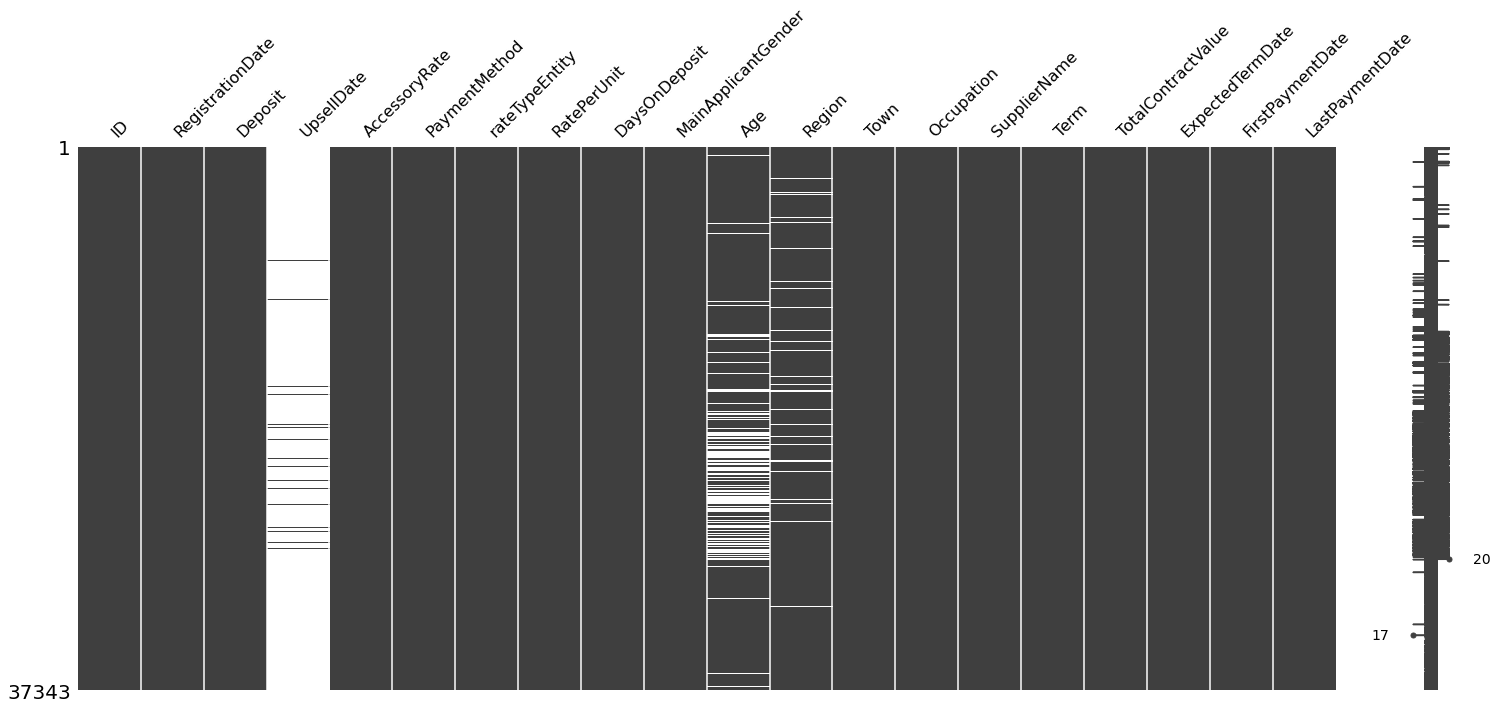

In [45]:
msno.matrix(metadata)

In [46]:
# Dropping UpsellDate because of too many missing values
metadata.drop(columns = "UpsellDate", inplace = True)

In [47]:
metadat.Region.unique()

array(['Mount Kenya Region', 'Coast Region', 'Nairobi Region', nan,
       'South Rift', 'Western', 'North Rift', 'Nyanza'], dtype=object)

In [48]:
metadat.describe()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue
count,37343.000000,37343.000000,37343.000000,37343.000000,30404.000000,37343.000000,37343.000000
mean,2348.631685,1.136090,49.923868,4.600835,38.855677,412.427657,22953.005142
std,417.814614,7.791789,57.500215,3.429060,12.300827,121.602544,10149.863172
min,0.000000,0.000000,35.000000,0.000000,19.000000,10.000000,10800.000000
25%,2000.000000,0.000000,40.000000,3.000000,29.000000,364.000000,16560.000000
50%,2000.000000,0.000000,40.000000,3.000000,36.000000,364.000000,16560.000000
75%,2500.000000,0.000000,55.000000,7.000000,46.000000,547.000000,33080.000000
max,8000.000000,240.000000,4000.000000,60.000000,120.000000,626.000000,64484.000000


<AxesSubplot:>

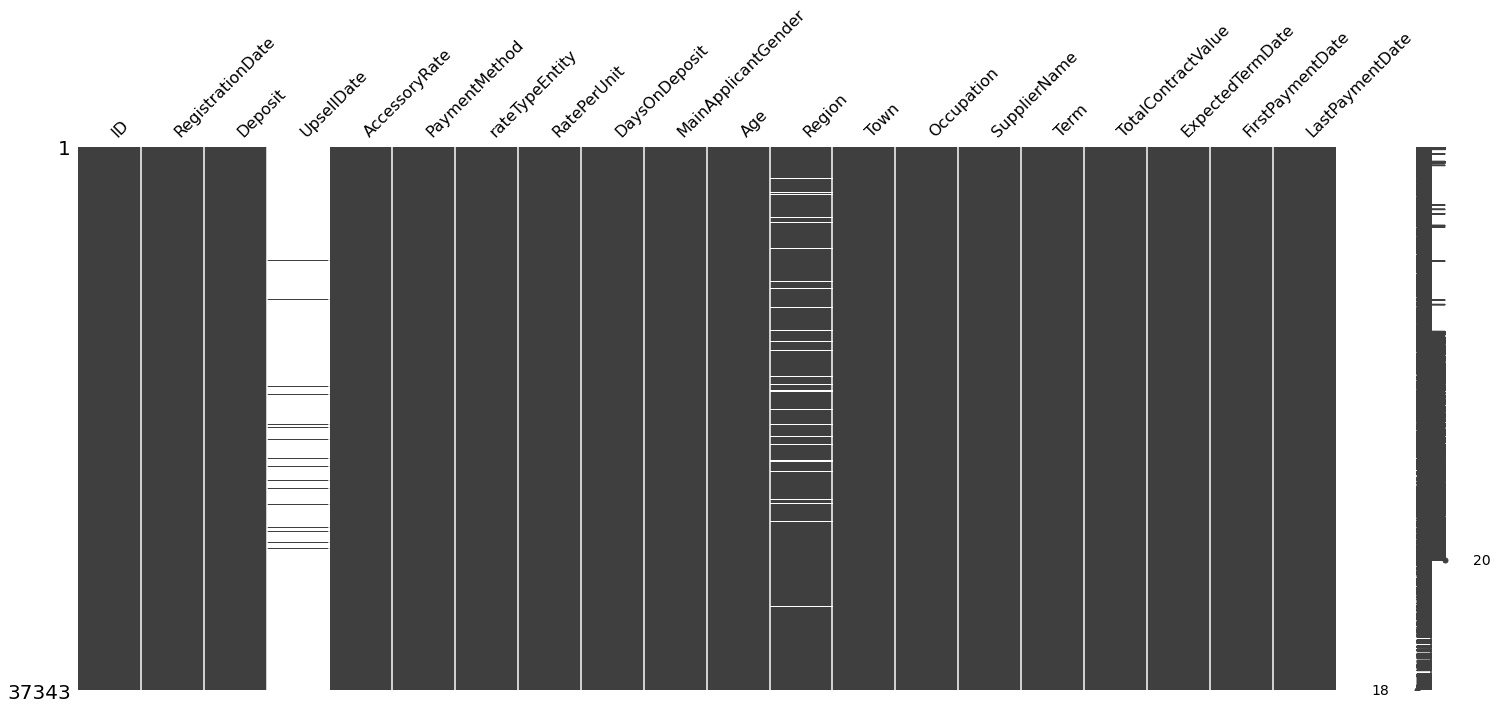

In [49]:
impute = metadat[['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 
                   'Term', 'TotalContractValue', 'Age']]
impute = impute.to_numpy()
impute = IterativeImputer().fit_transform(impute)
metadat.Age = impute[:,-1]
msno.matrix(metadat)

<AxesSubplot:xlabel='Age'>

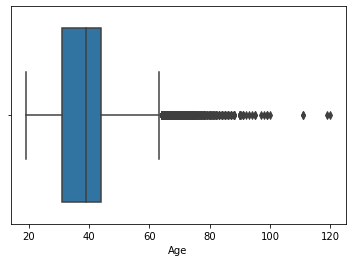

In [51]:
#removing outliers
sns.boxplot(x=metadat.Age)

In [54]:
metadat = metadat.loc[metadat.Age<=100]

<AxesSubplot:>

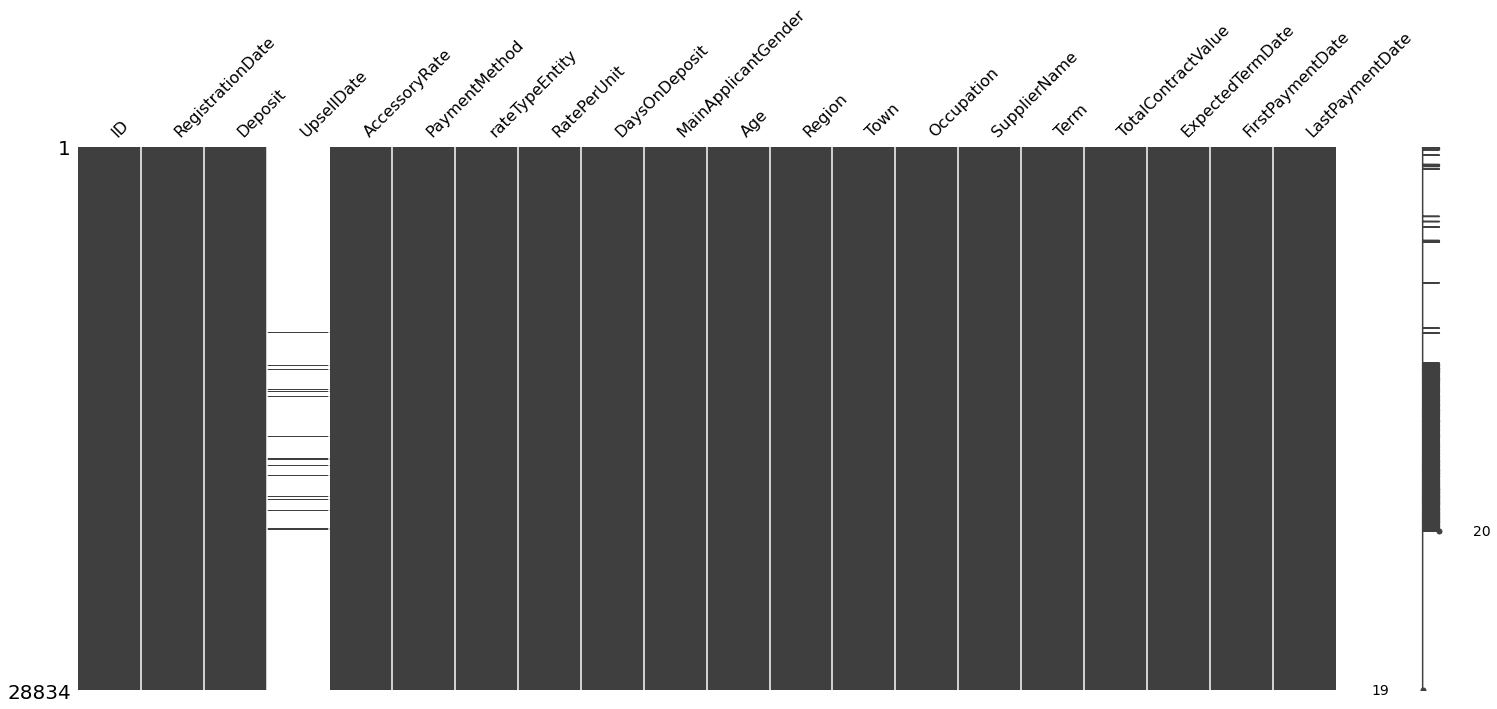

In [55]:
metadat = metadat.loc[~(metadata.Region.isna())]
msno.matrix(metadat)

In [56]:
metadat.drop(columns = "UpsellDate", inplace = True)

In [57]:
metadat.head(10)

,ID,RegistrationDate,Deposit,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10,2000,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09,2000,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18,2000,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13,2015-12-18 06:22:34,2017-02-01 15:23:44
4,ID_3K9VZ5J,2015-12-02,2000,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30,2015-12-05 10:34:32,2017-05-12 16:50:52
6,ID_6YU5YRB,2015-12-10,2000,0.0,FINANCED,DAILY,35,7,Male,56.0,Mount Kenya Region,Meru,Other,d_light,364,14740.0,2016-12-08,2015-12-10 15:15:16,2016-12-11 11:48:01
7,ID_FK5A5E9,2015-12-11,2000,0.0,FINANCED,DAILY,35,7,Female,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-09,2015-12-11 10:34:10,2017-01-08 15:50:18
8,ID_7OU9HLK,2015-12-06,2000,0.0,FINANCED,DAILY,35,7,Male,32.0,Mount Kenya Region,Embu,Business,d_light,364,14740.0,2016-12-04,2015-12-06 16:41:21,2020-07-22 07:08:17
9,ID_WVWTPGK,2015-12-05,2000,0.0,FINANCED,DAILY,35,7,Female,42.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-12-03,2015-12-04 18:11:33,2017-05-17 16:26:08
10,ID_EL1XKC7,2015-12-09,2000,0.0,FINANCED,DAILY,35,7,Male,43.0,Nairobi Region,Kitui,Other,d_light,364,14740.0,2016-12-07,2015-12-09 09:23:37,2016-12-14 06:18:11
11,ID_P0KAW56,2015-12-09,2000,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Embu,Business,d_light,364,14740.0,2016-12-07,2015-12-09 10:50:24,2016-12-09 16:55:12


In [58]:
metadat.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
AccessoryRate                 float64
PaymentMethod                  object
rateTypeEntity                 object
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender            object
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [60]:
metadat.nunique()

ID                     28834
RegistrationDate       28730
Deposit                   11
AccessoryRate             16
PaymentMethod              1
rateTypeEntity             3
RatePerUnit               11
DaysOnDeposit              6
MainApplicantGender        2
Age                       80
Region                     7
Town                      47
Occupation                 7
SupplierName               1
Term                      41
TotalContractValue        30
ExpectedTermDate       28726
FirstPaymentDate       28792
LastPaymentDate        28497
DaysLate                1072
dtype: int64

In [61]:
#two columns have same type for evry ID so we drop them
metadat.drop(columns=["SupplierName","PaymentMethod"],inplace=True)

In [59]:
metadat["DaysLate"] = (metadat.LastPaymentDate.dt.date - metadat.ExpectedTermDate.dt.date).astype('timedelta64[D]')
metadat.loc[metadat.DaysLate<=0,"DaysLate"]=0.0

In [62]:
#dropping categorical columns for now for the model analysis
metadat.drop(columns=["RegistrationDate", "rateTypeEntity", "MainApplicantGender", "Region", "Town", "Occupation", "ExpectedTermDate", "FirstPaymentDate", "LastPaymentDate"],inplace=True)

In [63]:
metadat.dtypes

ID                     object
Deposit                 int64
AccessoryRate         float64
RatePerUnit             int64
DaysOnDeposit           int64
Age                   float64
Term                    int64
TotalContractValue    float64
DaysLate              float64
dtype: object

In [64]:
merged_test = pd.merge(left=metadat, right=test, on="ID")

In [65]:
merged_test.head()

,ID,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,DaysLate,FirstPaymentDate,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_6L67PAA,2000,0.0,35,7,33.0,364,14740.0,1264.0,2015-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_7OU9HLK,2000,0.0,35,7,32.0,364,14740.0,1326.0,2015-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_WVWTPGK,2000,0.0,35,7,42.0,364,14740.0,165.0,2015-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_04DSDQS,2000,0.0,35,7,38.0,364,14740.0,64.0,2015-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_4BNXJX1,2000,0.0,35,7,59.0,364,14740.0,120.0,2015-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
merged_test.drop(columns=['FirstPaymentDate', 'LastPaymentDate'],inplace=True)


In [69]:
merged_test.to_pickle("merged_test-processed.pkl")

In [102]:
merged_train = pd.merge(left=metadat, right=train, on="ID")
merged_train.head()

,ID,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,DaysLate,m1,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,ID_K00S4N4,2000,0.0,35,7,41.0,364,14740.0,0.0,1225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID_102CV85,2000,35.0,35,7,48.0,392,29480.0,19.0,980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID_3K9VZ5J,2000,0.0,35,7,56.0,364,14740.0,163.0,630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID_6YU5YRB,2000,0.0,35,7,56.0,364,14740.0,3.0,1050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID_FK5A5E9,2000,0.0,35,7,41.0,364,14740.0,30.0,855.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
merged_train.drop(columns=['FirstPaymentDate', 'LastPaymentDate'],inplace=True)

In [103]:
merged_train.to_pickle("merged_train-processed.pkl")

## <font color='#eb3483'>Visualizations</font>

In [33]:
# let's see the correlation coefficients between numerical variables 
correlations = merged.select_dtypes(include=[float]).corr()
correlations

,AccessoryRate,Age,TotalContractValue,m1,m2,m3,m4,m5,m6,2015-11-01,...,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,AveragePayment
AccessoryRate,1.000000,0.059873,0.474111,0.188158,0.154764,0.172114,0.169382,0.203168,0.074200,-0.002240,...,-0.005384,-0.002852,0.004949,-0.005192,0.015254,0.007776,0.025404,0.029579,0.016996,0.290215
Age,0.059873,1.000000,0.069155,0.063117,0.079894,0.082820,0.079204,0.071867,0.060075,0.003252,...,-0.186312,-0.179319,-0.157895,-0.146801,-0.122995,-0.110639,-0.067002,-0.060464,-0.057332,0.073460
TotalContractValue,0.474111,0.069155,1.000000,0.212662,0.180566,0.213643,0.208557,0.203139,0.120488,-0.012429,...,-0.187809,-0.172453,-0.156468,-0.133605,-0.054607,-0.022812,0.033900,0.064427,0.084309,0.552573
m1,0.188158,0.063117,0.212662,1.000000,0.580481,0.658766,0.626634,0.596603,0.278523,0.002423,...,0.124119,0.122852,0.116412,0.092288,0.046538,0.020390,0.023836,0.028948,0.046466,0.571128
m2,0.154764,0.079894,0.180566,0.580481,1.000000,0.579332,0.549529,0.512939,0.245634,0.006644,...,0.081556,0.078063,0.072203,0.047735,0.016062,-0.003554,-0.006368,-0.002018,0.003694,0.482160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.007776,-0.110639,-0.022812,0.020390,-0.003554,-0.018032,0.000790,-0.005571,-0.006524,-0.005890,...,0.425257,0.418204,0.404201,0.502932,0.655262,1.000000,0.623993,0.469194,0.428948,0.155088
2020-09-01,0.025404,-0.067002,0.033900,0.023836,-0.006368,-0.019813,-0.006252,-0.009876,-0.004519,-0.004643,...,0.290913,0.294064,0.277809,0.339662,0.449347,0.623993,1.000000,0.526833,0.471627,0.156131
2020-10-01,0.029579,-0.060464,0.064427,0.028948,-0.002018,-0.022570,-0.002676,-0.005588,-0.005331,-0.004116,...,0.230045,0.225699,0.216337,0.265546,0.347820,0.469194,0.526833,1.000000,0.621361,0.154892
2020-11-01,0.016996,-0.057332,0.084309,0.046466,0.003694,-0.016172,0.007705,-0.006074,-0.001947,-0.004056,...,0.208607,0.212175,0.201370,0.245527,0.329078,0.428948,0.471627,0.621361,1.000000,0.161723


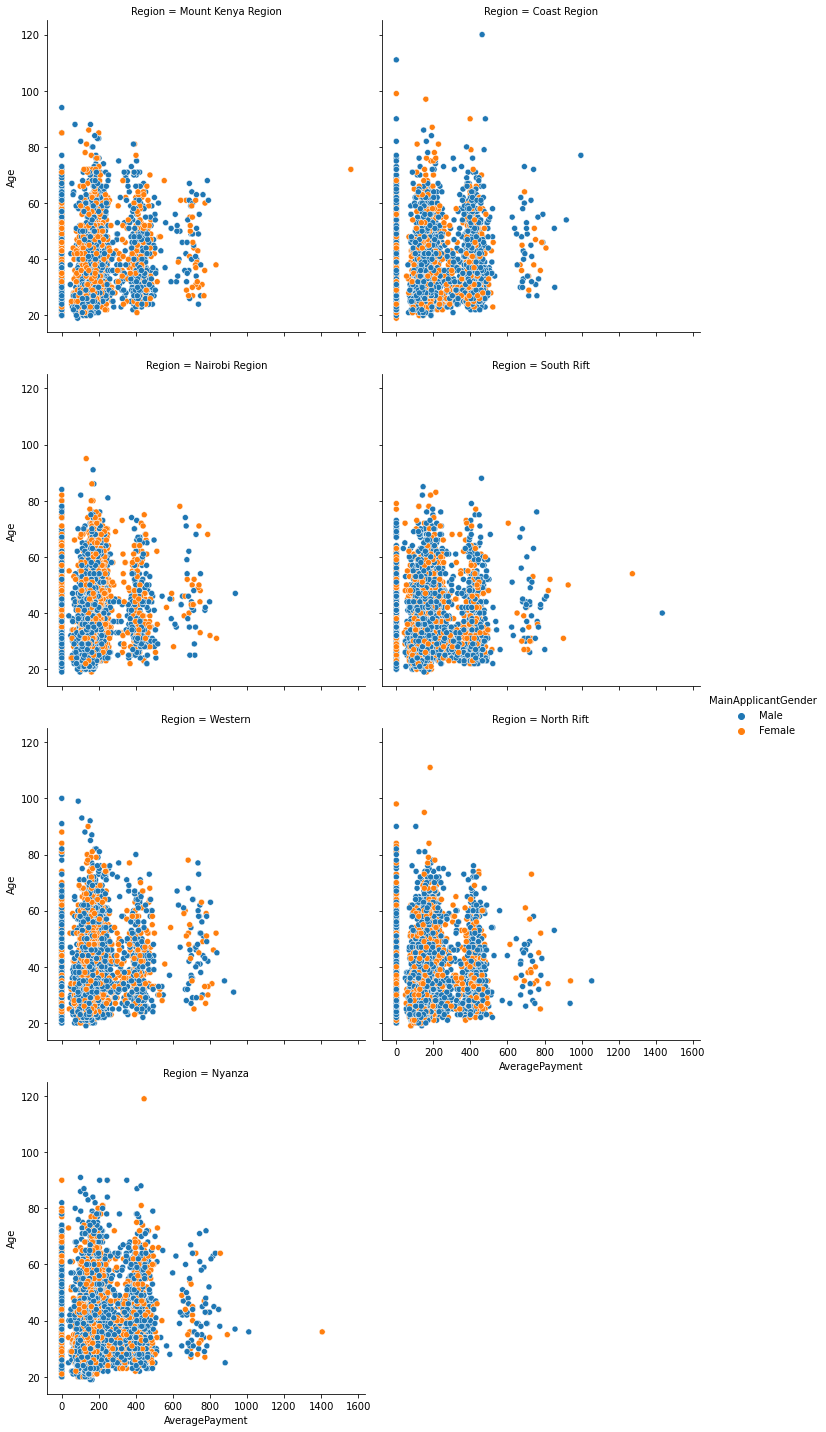

In [36]:
#let's see the relationship between average payment and age
sns.relplot(data=merged, x="AveragePayment", y="Age", hue="MainApplicantGender", col="Region", col_wrap=2)

## <font color='#eb3483'>Summary</font>

Most users are male. However, there does not seem to be much variation between the two genders' average total payments over their contract terms in each Region. Something that is of note though is that the average payment value between both genders for every Region is between the 200-600 region. This can be used to predict a model of future payments based on the contract value and how much is left on the contract since the last payment.

In [37]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 432x288 with 0 Axes>

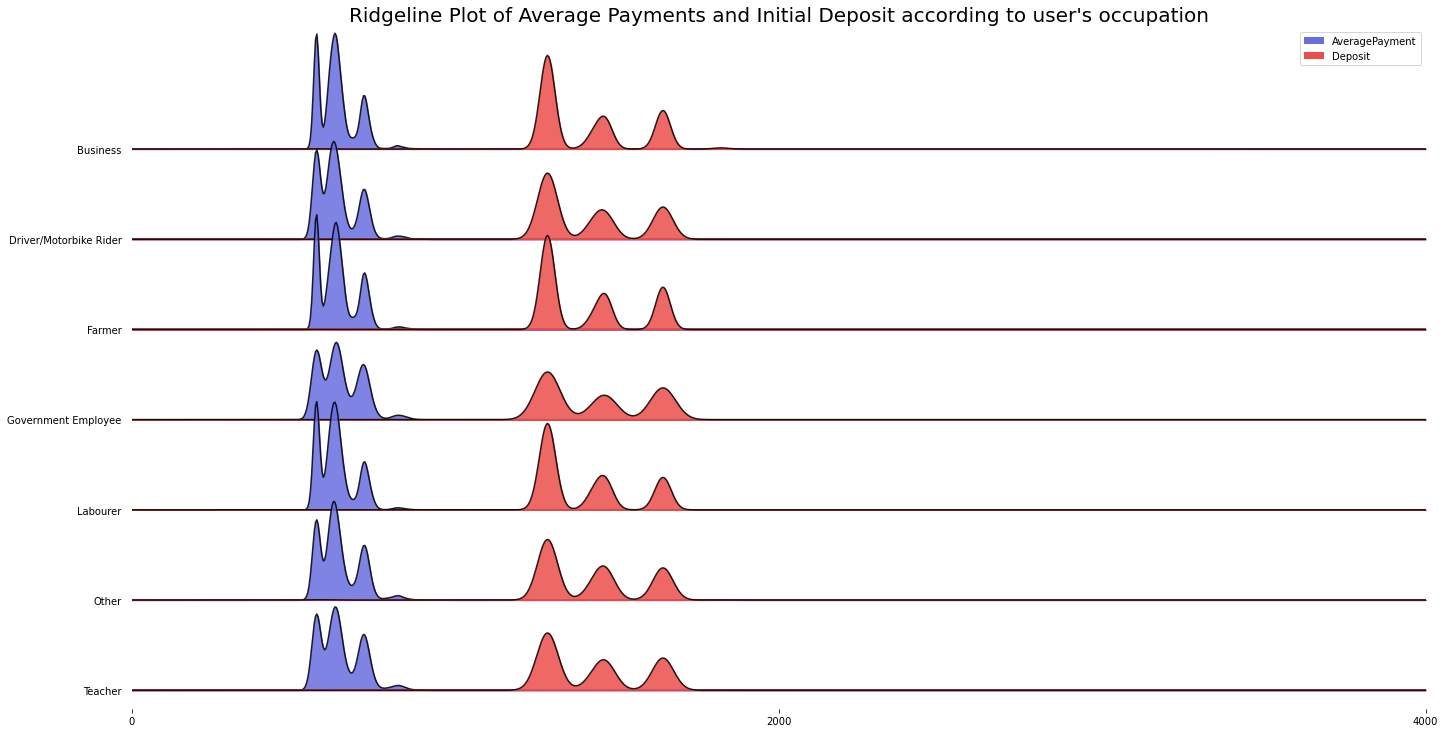

In [67]:
plt.figure()

joyplot(
    data=merged[['AveragePayment', 'Deposit', 'Occupation']], 
    by='Occupation',
    column=['AveragePayment', 'Deposit'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(20, 10)

)
plt.xlim(0, 4000)
plt.title("Ridgeline Plot of Average Payments and Initial Deposit according to user's occupation", fontsize=20)
plt.show()

## <font color='#eb3483'>Summary</font>

The purpose of the ridgeline plot is to see the distribution of average payments amongst every user's occupation compared with their initial deposit. The peaks for each occupation follow a similar trend/pattern. But something useful to note is how a high proportion of those in Business, Farmers and Labourers' average payment are lower/towards zero. This can be useful with the loan status predictor (likelihood of being a good/bad payer)  

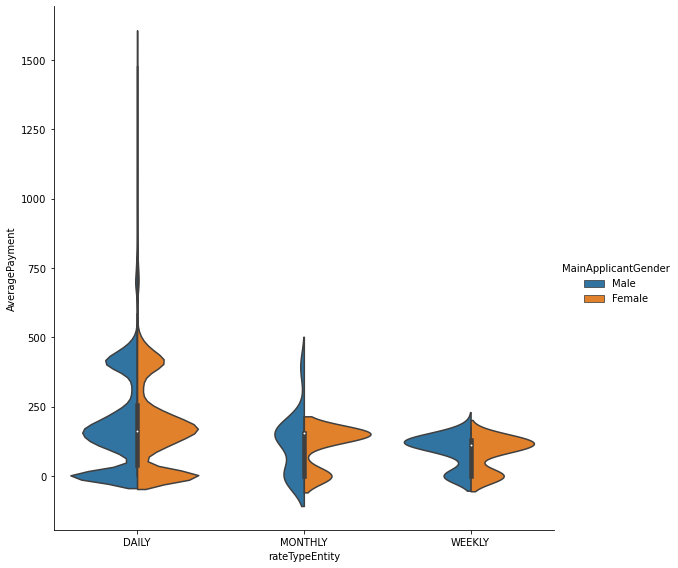

In [54]:
sns.catplot(x="rateTypeEntity", y="AveragePayment", hue="MainApplicantGender",
            kind="violin", split=True, height=8, data=merged)

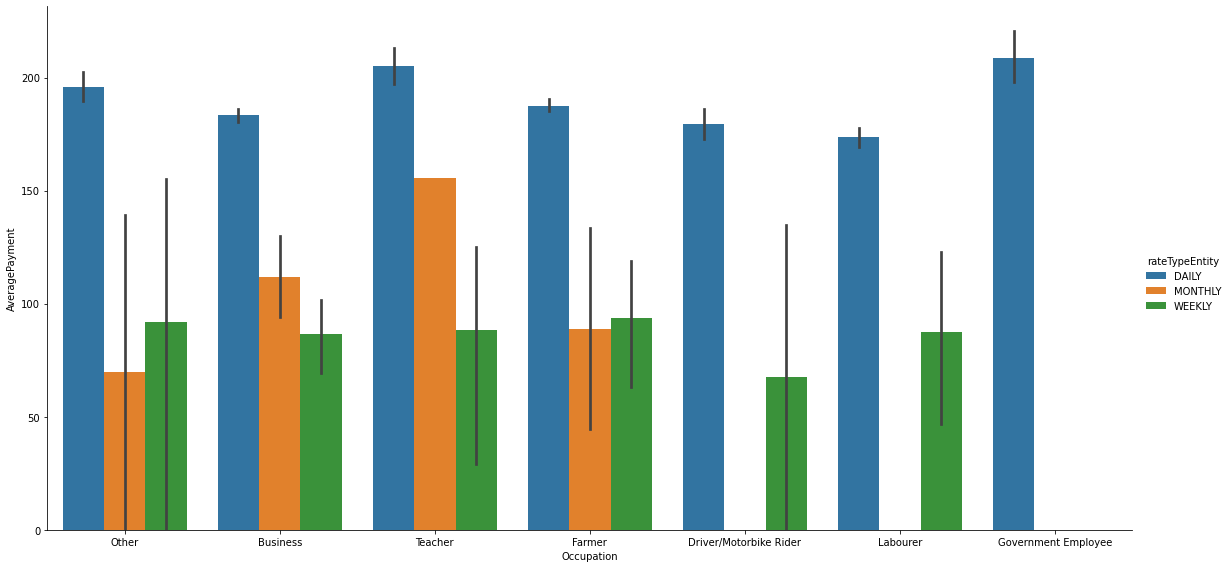

In [63]:
sns.catplot(x="Occupation", y="AveragePayment", hue="rateTypeEntity", kind="bar", data=merged, height=8, aspect=2)

## <font color='#eb3483'>Summary</font>

Higher proportion of users are likely to pay Daily between the two genders. In relation to occupation, the same can be said that most users pay Daily. However, something of note is how there are no Monthly payers for the Driver, Labourer and Government Employee users. It's hard to see yet, but it is possible that payments which are more frequent (i.e daily or weekly) would be more reliable in terms of predicting future payment and building loan status predictor model. But there is more to analyze.

## <font color='#eb3483'>Model Analaysis</font>

To build a loan status predictor we need to have criteria to detrmine whether a user is a good/bad payer. For this we can use classification as we are predicting a categorical outcome (which in this case is binary - good/bad)

In [104]:
merged_train = pd.read_pickle("merged_train-processed.pkl")

In [105]:
cols = merged_train.columns

In [106]:
#isolating months to predict as target outcome variable for pca analysis
targets = ["m1","m2","m3","m4","m5","m6"]

In [107]:
target_id = [merged_train.columns.get_loc(c) for c in targets if c in merged_train]

In [108]:
cols = cols.delete([target_id])[1:]
cols

Index(['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age',
       'Term', 'TotalContractValue', 'DaysLate', 'FirstPaymentDate',
       'LastPaymentDate', 'TotalPastPayments', 'AveragePayment', '2015-11-01',
       '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
       '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
       '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
       '

In [109]:
#standardize data
scaler = StandardScaler()

In [110]:
df_train = pd.DataFrame(scaler.fit_transform(merged_train.loc[:,cols]), columns=cols)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [99]:
merged_train.dtypes

ID                object
Deposit            int64
AccessoryRate    float64
RatePerUnit        int64
DaysOnDeposit      int64
                  ...   
2020-07-01       float64
2020-08-01       float64
2020-09-01       float64
2020-10-01       float64
2020-11-01       float64
Length: 80, dtype: object

In [ ]:
sns.pairplot(merged.loc[:, ["Deposit", "Term", "DaysOnDeposit", "Age", "AveragePayment"]])

In [87]:
merged.AveragePayment.describe()

count    37343.000000
mean       185.365181
std        161.981034
min          0.000000
25%         18.196721
50%        161.639344
75%        254.426230
max       1560.475410
Name: AveragePayment, dtype: float64

In [91]:
# attempt to simplify this dataset and turn it into a binary classification problem according to the average payment for each ID.
merged["Good Payer"] = merged.AveragePayment >= 150